In [4]:
import pandas as pd
import numpy as np

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')

# para pintar
import pylab as plt
import seaborn as sns

In [18]:
df_match = pd.read_csv('../data/matchs_stats.csv')

df_match.tail()

,season,date,event,patch,blue_team,red_team,winner,ban_1_blue_team,ban_2_blue_team,ban_3_blue_team,ban_4_blue_team,ban_5_blue_team,ban_1_red_team,ban_2_red_team,ban_3_red_team,ban_4_red_team,ban_5_red_team,pick_1_blue_team,pick_2_blue_team,pick_3_blue_team,pick_4_blue_team,pick_5_blue_team,pick_1_red_team,pick_2_red_team,pick_3_red_team,pick_4_red_team,pick_5_red_team,top_blue_team,jungler_blue_team,mid_blue_team,adc_blue_team,support_blue_team,top_red_team,jungler_red_team,mid_red_team,adc_red_team,support_red_team
1065,12,2022-10-08,Main,12.18,T1,EDward_Gaming,T1,LeBlanc,Maokai,Graves,Renekton,Jarvan IV,Caitlyn,Sejuani,Aatrox,Kennen,Poppy,Fiora,Lee Sin,Akali,Sivir,Yuumi,Ornn,Vi,Azir,Kalista,Renata Glasc,Zeus,Oner,Faker,Gumayusi,Keria,Flandre,JieJie,Scout,Viper,Meiko
1066,12,2022-10-08,Main,12.18,JD_Gaming,Evil_Geniuses_2e-NA,JD_Gaming,Maokai,Akali,Ornn,Sylas,Mordekaiser,Caitlyn,Aatrox,Bel'Veth,Taliyah,Leona,Sejuani,Viego,Azir,Aphelios,Thresh,Gangplank,Graves,Viktor,Varus,Tahm Kench,369,Kanavi,Yagao,Hope,Missing,Impact,Inspired,jojopyun,Kaori,Vulcan
1067,12,2022-10-07,Main,12.18,CTBC_Flying_Oyster,100_Thieves,CTBC_Flying_Oyster,Yuumi,Sylas,Seraphine,Leona,Braum,Caitlyn,Maokai,Tristana,Nautilus,Alistar,Aatrox,Viego,Viktor,Kai'Sa,Rell,Fiora,Sejuani,Akali,Miss Fortune,Amumu,Rest,Gemini,Mission,Shunn,Koala,Ssumday,Closer,Abbedagge,FBI,huhi
1068,12,2022-10-07,Main,12.18,G2_Esports,DWG_KIA,DWG_KIA,Aatrox,Maokai,Varus,Fiora,Nautilus,Sylas,Sejuani,Senna,LeBlanc,Akali,Ornn,Jarvan IV,Seraphine,Caitlyn,Lux,Camille,Graves,Azir,Jhin,Leona,BrokenBlade,Jankos,caPs,Flakked,Targamas,Nuguri,Canyon,ShowMaker,deokdam,Kellin
1069,12,2022-10-07,Main,12.18,Cloud9,Fnatic,Fnatic,Graves,Trundle,Caitlyn,Leona,Renekton,Aatrox,Olaf,Yuumi,Sylas,Viktor,Fiora,Sejuani,LeBlanc,Miss Fortune,Nautilus,Ornn,Maokai,Azir,Aphelios,Renata Glasc,Fudge,Blaber,Jensen,Berserker,Zven,Wunder,Razork,Humanoid,Upset,Hylissang


In [6]:
def check_nan(df: pd.DataFrame) -> None:
    
    """Recibe un dataframe y enseña % de valores nulos y la grafica"""
    
    nan_cols = df.isna().mean()  * 100  # porcentaje de nulo en cada columna

    display(f'N nan cols: {len(nan_cols[nan_cols>0])}')
    display(nan_cols[nan_cols>0])
    
    # grafico de nulos en el dataframe
    plt.figure(figsize=(10, 6))  # inicia la figura y establece el tamaño

    sns.heatmap(df.isna(),   # datos
                yticklabels=False,
                cmap='viridis',
                cbar=False
               )

    plt.show();

'N nan cols: 5'

patch              11.401869
ban_4_blue_team    32.710280
ban_5_blue_team    32.897196
ban_4_red_team     32.710280
ban_5_red_team     32.710280
dtype: float64

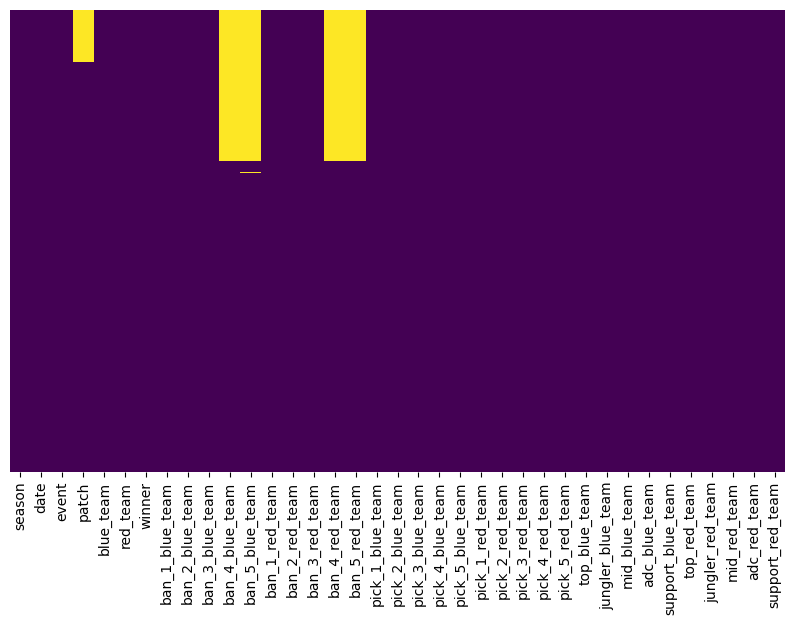

In [20]:
check_nan(df_match)

In [21]:
df_match[['patch']].fillna('Unknown', inplace=True)

In [22]:
df_match.fillna('no_ban', inplace=True)

In [14]:
df_player = pd.read_csv('../data/players_stats.csv')

df_player.head()

,season,event,team,player,games_played,wins,loses,win_rate,kills,deaths,assists,kill_death_assist_ratio,creep_score,cs/min,gold,gold/min,damage,damage/min,kill_participation,kill_share,gold_share
0,1,Main,Against_All_authority,Kujaa,12,7,5,58.3,0.25,2.58,8.33,3.32,13.58,0.34,7.8,198,NaN,NaN,NaN,NaN,NaN
1,1,Main,Against_All_authority,Linak,12,7,5,58.3,1.75,3.58,7.67,2.63,113.17,2.86,10.3,259,NaN,NaN,NaN,NaN,NaN
2,1,Main,Against_All_authority,MoMa,12,7,5,58.3,4.17,2.75,5.58,3.55,242.25,6.13,12.1,307,NaN,NaN,NaN,NaN,NaN
3,1,Main,Against_All_authority,sOAZ,12,7,5,58.3,4.00,2.92,7.08,3.80,214.67,5.43,11.6,293,NaN,NaN,NaN,NaN,NaN
4,1,Main,Against_All_authority,YellOwStaR,12,7,5,58.3,3.75,3.25,5.17,2.74,276.33,6.99,13.2,333,NaN,NaN,NaN,NaN,NaN


'N nan cols: 5'

damage                68.12159
damage/min            68.12159
kill_participation    13.40608
kill_share            13.40608
gold_share            13.40608
dtype: float64

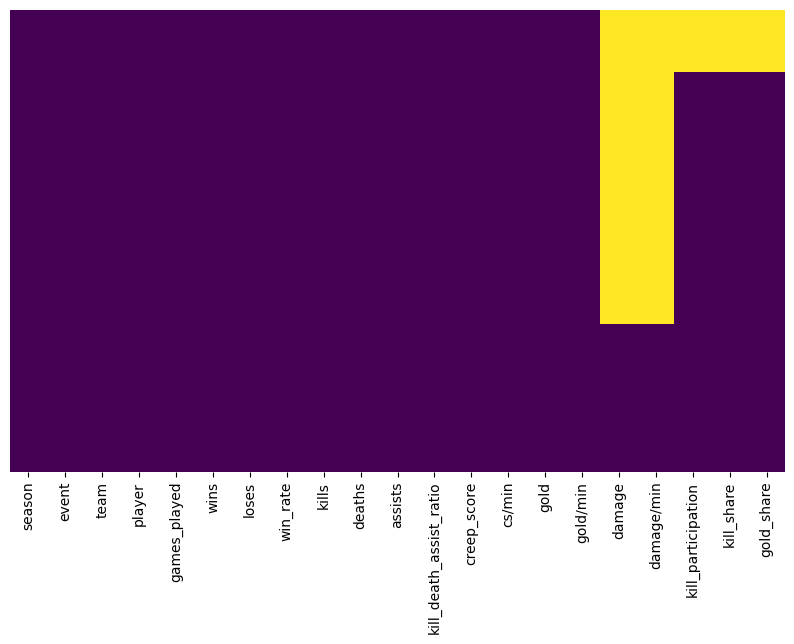

In [16]:
check_nan(df_player)

In [17]:
df_player.fillna('Unknown', inplace=True)

In [23]:
df_champ = pd.read_csv('../data/champions_stats.csv')

df_champ.head()

,season,event,champion,games_contests,pick_ban_ratio,banned_games,played_games,played_by_number_of_players,win,lose,win_rate,kills,deaths,assists,kill_death_assist_ratio,creep_score,cs/min,gold,gold/min,damage,damage/min,kill_participation,kill_share,gold_share
0,1,Main,Nunu,27,96.4,9.0,18,6.0,12,6,66.7,1.06,2.67,8.61,3.63,90.17,2.46,9.4,256.0,NaN,NaN,NaN,NaN,NaN
1,1,Main,Alistar,25,89.3,12.0,13,4.0,8,5,61.5,3.46,2.69,7.38,4.03,114.00,3.11,9.6,261.0,NaN,NaN,NaN,NaN,NaN
2,1,Main,Rumble,23,82.1,21.0,2,2.0,2,0,100.0,3.50,1.50,9.00,8.33,162.00,5.02,10.1,311.0,NaN,NaN,NaN,NaN,NaN
3,1,Main,Vladimir,22,78.6,14.0,8,5.0,3,5,37.5,4.50,3.50,3.88,2.39,224.63,5.99,11.2,298.0,NaN,NaN,NaN,NaN,NaN
4,1,Main,Twisted Fate,22,78.6,18.0,4,2.0,2,2,50.0,2.00,4.50,5.50,1.67,206.50,5.43,11.4,299.0,NaN,NaN,NaN,NaN,NaN


'N nan cols: 16'

banned_games                   28.178439
played_by_number_of_players     3.866171
win_rate                        3.866171
kills                           3.866171
deaths                          3.866171
assists                         3.866171
kill_death_assist_ratio         3.866171
creep_score                     3.866171
cs/min                          3.866171
gold                            3.866171
gold/min                        3.866171
damage                         64.312268
damage/min                     64.312268
kill_participation             16.505576
kill_share                     16.505576
gold_share                     16.356877
dtype: float64

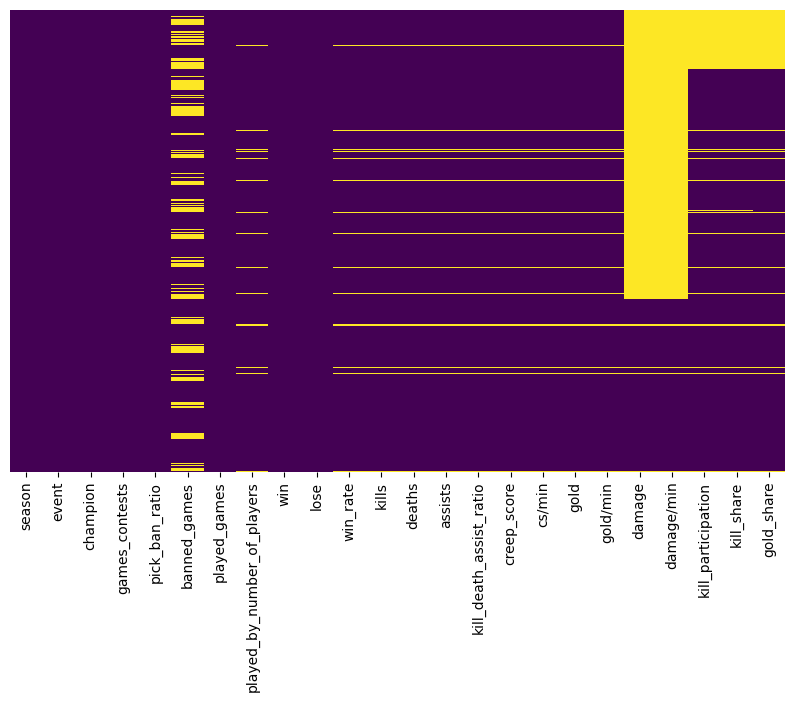

In [24]:
check_nan(df_champ)

In [25]:
df_champ[['damage', 'damage/min', 'kill_participation', 'kill_share', 'gold_share']].fillna('Unknown', inplace = True)

In [32]:
bad_index = df_champ.win_rate[df_champ.win_rate.isna()].index

In [33]:
df_champ.iloc[bad_index,:]

,season,event,champion,games_contests,pick_ban_ratio,banned_games,played_games,played_by_number_of_players,win,lose,win_rate,kills,deaths,assists,kill_death_assist_ratio,creep_score,cs/min,gold,gold/min,damage,damage/min,kill_participation,kill_share,gold_share
71,2,Main,Twisted Fate,7,22.6,7.0,0,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89,2,Main,Sivir,3,9.7,3.0,0,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,2,Main,Draven,2,6.5,2.0,0,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
103,2,Main,Gangplank,1,3.2,1.0,0,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
104,2,Main,Twitch,1,3.2,1.0,0,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
173,3,Main,Ziggs,1,1.6,1.0,0,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
211,4,Main,Aatrox,6,7.7,6.0,0,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
234,4,Main,Gragas,1,1.3,1.0,0,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
352,6,Main,Kassadin,4,5.2,4.0,0,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
407,7,Play in,Trundle,5,12.8,5.0,0,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
bad_index

RangeIndex(start=0, stop=1345, step=1)

In [35]:
df_champ.champion.value_counts()

Lee Sin         18
Alistar         17
Jarvan IV       17
Gragas          17
Ezreal          16
Syndra          16
Shen            16
Tristana        16
Caitlyn         15
Orianna         15
Leona           15
Thresh          15
Ryze            15
Braum           15
Nidalee         15
Lucian          15
Jayce           14
Lulu            14
Gangplank       14
Ashe            14
Graves          14
Jax             14
Vayne           14
Irelia          14
Kassadin        13
LeBlanc         13
Gnar            13
Nautilus        13
Olaf            13
Draven          13
Lissandra       13
Galio           13
Rumble          13
Vladimir        13
Twisted Fate    13
Nocturne        13
Sivir           12
Zilean          12
Renekton        12
Varus           12
Camille         12
Rakan           12
Fiora           12
Kalista         12
Karma           12
Blitzcrank      12
Morgana         11
Tahm Kench      11
Aatrox          11
Akali           11
Azir            11
Cassiopeia      11
Maokai      

In [36]:
df_champ.fillna('Unknown', inplace=True)

In [38]:
df_champ[df_champ.champion=='Lee Sin']

,season,event,champion,games_contests,pick_ban_ratio,banned_games,played_games,played_by_number_of_players,win,lose,win_rate,kills,deaths,assists,kill_death_assist_ratio,creep_score,cs/min,gold,gold/min,damage,damage/min,kill_participation,kill_share,gold_share
34,1,Main,Lee Sin,2,7.1,Unknown,2,2.0,1,1,50.0,3.0,5.0,4.0,1.4,197.0,5.47,10.1,279.0,Unknown,Unknown,Unknown,Unknown,Unknown
69,2,Main,Lee Sin,7,22.6,4.0,3,2.0,3,0,100.0,4.33,3.0,14.33,6.22,124.67,3.59,10.0,287.0,Unknown,Unknown,Unknown,Unknown,Unknown
113,3,Main,Lee Sin,40,63.5,14.0,26,10.0,16,10,61.5,2.62,2.15,8.0,4.93,95.5,3.0,8.4,265.0,Unknown,Unknown,Unknown,Unknown,Unknown
176,4,Main,Lee Sin,72,92.3,29.0,43,16.0,24,19,55.8,2.91,2.74,7.21,3.69,102.6,2.84,10.4,287.0,Unknown,Unknown,65.9,18.9,17.5
248,5,Main,Lee Sin,28,38.4,10.0,18,7.0,9,9,50.0,2.5,2.78,8.0,3.78,91.67,2.77,9.7,292.0,Unknown,Unknown,75.3,17.9,17.8
318,6,Main,Lee Sin,45,58.4,8.0,37,13.0,21,16,56.8,2.7,2.38,6.3,3.78,152.84,3.83,13.6,341.0,Unknown,Unknown,65.8,19.8,18.8
400,7,Play in,Lee Sin,6,15.4,1.0,5,3.0,1,4,20.0,1.8,2.0,5.6,3.7,148.2,4.31,10.9,317.0,Unknown,Unknown,64.9,15.8,18.0
478,7,Main,Lee Sin,4,5.0,Unknown,4,3.0,2,2,50.0,1.25,2.5,4.25,2.2,139.5,3.56,12.1,308.0,Unknown,Unknown,73.3,16.7,16.9
559,8,Play in,Lee Sin,4,9.5,2.0,2,2.0,1,1,50.0,4.0,2.5,7.0,4.4,153.5,5.31,10.5,363.0,Unknown,Unknown,73.3,26.7,20.2
619,8,Main,Lee Sin,24,31.2,7.0,17,7.0,9,8,52.9,2.71,2.06,5.0,3.74,151.71,4.96,10.2,333.0,Unknown,Unknown,69.3,24.3,18.8


In [40]:
df_match.head(1)

,season,date,event,patch,blue_team,red_team,winner,ban_1_blue_team,ban_2_blue_team,ban_3_blue_team,ban_4_blue_team,ban_5_blue_team,ban_1_red_team,ban_2_red_team,ban_3_red_team,ban_4_red_team,ban_5_red_team,pick_1_blue_team,pick_2_blue_team,pick_3_blue_team,pick_4_blue_team,pick_5_blue_team,pick_1_red_team,pick_2_red_team,pick_3_red_team,pick_4_red_team,pick_5_red_team,top_blue_team,jungler_blue_team,mid_blue_team,adc_blue_team,support_blue_team,top_red_team,jungler_red_team,mid_red_team,adc_red_team,support_red_team
0,1,2011-06-20,Main,no_ban,Against_All_authority,Fnatic,Fnatic,Alistar,Gragas,Anivia,no_ban,no_ban,Rumble,Nunu,Amumu,no_ban,no_ban,Malzahar,Jarvan IV,Irelia,Corki,Janna,Brand,Warwick,Karthus,Ashe,Sona,MoMa,Linak,sOAZ,YellOwStaR,Kujaa,Shushei,Cyanide,xPeke,Lamia,Mellisan


In [41]:
df_player.head(1)

,season,event,team,player,games_played,wins,loses,win_rate,kills,deaths,assists,kill_death_assist_ratio,creep_score,cs/min,gold,gold/min,damage,damage/min,kill_participation,kill_share,gold_share
0,1,Main,Against_All_authority,Kujaa,12,7,5,58.3,0.25,2.58,8.33,3.32,13.58,0.34,7.8,198,Unknown,Unknown,Unknown,Unknown,Unknown


In [43]:
df_champ.fillna('didnt exist', inplace = True)

In [47]:
df_champ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1345 entries, 0 to 1344
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   season                       1345 non-null   int64  
 1   event                        1345 non-null   object 
 2   champion                     1345 non-null   object 
 3   games_contests               1345 non-null   int64  
 4   pick_ban_ratio               1345 non-null   float64
 5   banned_games                 1345 non-null   object 
 6   played_games                 1345 non-null   int64  
 7   played_by_number_of_players  1345 non-null   object 
 8   win                          1345 non-null   int64  
 9   lose                         1345 non-null   int64  
 10  win_rate                     1345 non-null   object 
 11  kills                        1345 non-null   object 
 12  deaths                       1345 non-null   object 
 13  assists           

In [48]:
df_player.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1283 entries, 0 to 1282
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   season                   1283 non-null   int64  
 1   event                    1283 non-null   object 
 2   team                     1283 non-null   object 
 3   player                   1283 non-null   object 
 4   games_played             1283 non-null   int64  
 5   wins                     1283 non-null   int64  
 6   loses                    1283 non-null   int64  
 7   win_rate                 1283 non-null   float64
 8   kills                    1283 non-null   float64
 9   deaths                   1283 non-null   float64
 10  assists                  1283 non-null   float64
 11  kill_death_assist_ratio  1283 non-null   float64
 12  creep_score              1283 non-null   float64
 13  cs/min                   1283 non-null   float64
 14  gold                    

In [49]:
df_match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1070 entries, 0 to 1069
Data columns (total 37 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   season             1070 non-null   int64 
 1   date               1070 non-null   object
 2   event              1070 non-null   object
 3   patch              1070 non-null   object
 4   blue_team          1070 non-null   object
 5   red_team           1070 non-null   object
 6   winner             1070 non-null   object
 7   ban_1_blue_team    1070 non-null   object
 8   ban_2_blue_team    1070 non-null   object
 9   ban_3_blue_team    1070 non-null   object
 10  ban_4_blue_team    1070 non-null   object
 11  ban_5_blue_team    1070 non-null   object
 12  ban_1_red_team     1070 non-null   object
 13  ban_2_red_team     1070 non-null   object
 14  ban_3_red_team     1070 non-null   object
 15  ban_4_red_team     1070 non-null   object
 16  ban_5_red_team     1070 non-null   object


**EXPORT TO CSV**

In [44]:
df_champ.to_csv('../data/clean/df_champ.csv', index=False)

In [45]:
df_match.to_csv('../data/clean/df_match.csv', index=False)

In [46]:
df_player.to_csv('../data/clean/df_player.csv', index=False)

In [50]:
df_champ.to_excel('../data/clean/df_champ.xlsx', index=False)

In [51]:
df_match.to_excel('../data/clean/df_match.xlsx', index=False)

In [52]:
df_player.to_excel('../data/clean/df_player.xlsx', index=False)